## Pump Sensor data using PCA, KNN and Isolation forest

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
sensor = pd.read_csv("sensor.csv", index_col="timestamp")

In [4]:
sensor.head()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [5]:
sensor.shape

(220320, 54)

In [6]:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220320 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null    

In [7]:
# dropping the sensor 15 column as it is entirely blank
sensor=sensor.drop(["sensor_15", "Unnamed: 0"], axis =1)

In [8]:
# converting time from the object to date time format
sensor = sensor.drop_duplicates()
sensor.index= pd.to_datetime(sensor.index)

In [9]:
type(sensor.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [10]:
list= sensor.columns.to_list()

In [11]:
# getting the percentage of missing values in all the columns
df = pd.DataFrame(sensor[list].isna().sum()*100/len(sensor), columns= ["Percentage"])
df.sort_values(by = "Percentage", ascending=False)

,Percentage
sensor_50,34.823679
sensor_51,6.952595
sensor_00,4.612222
sensor_07,2.465002
sensor_08,2.304501
sensor_06,2.165155
sensor_09,2.073177
sensor_01,0.162801
sensor_30,0.115432
sensor_29,0.027593


In [12]:
sensor_1 = sensor.drop(["sensor_50","sensor_51","sensor_00"], axis =1)

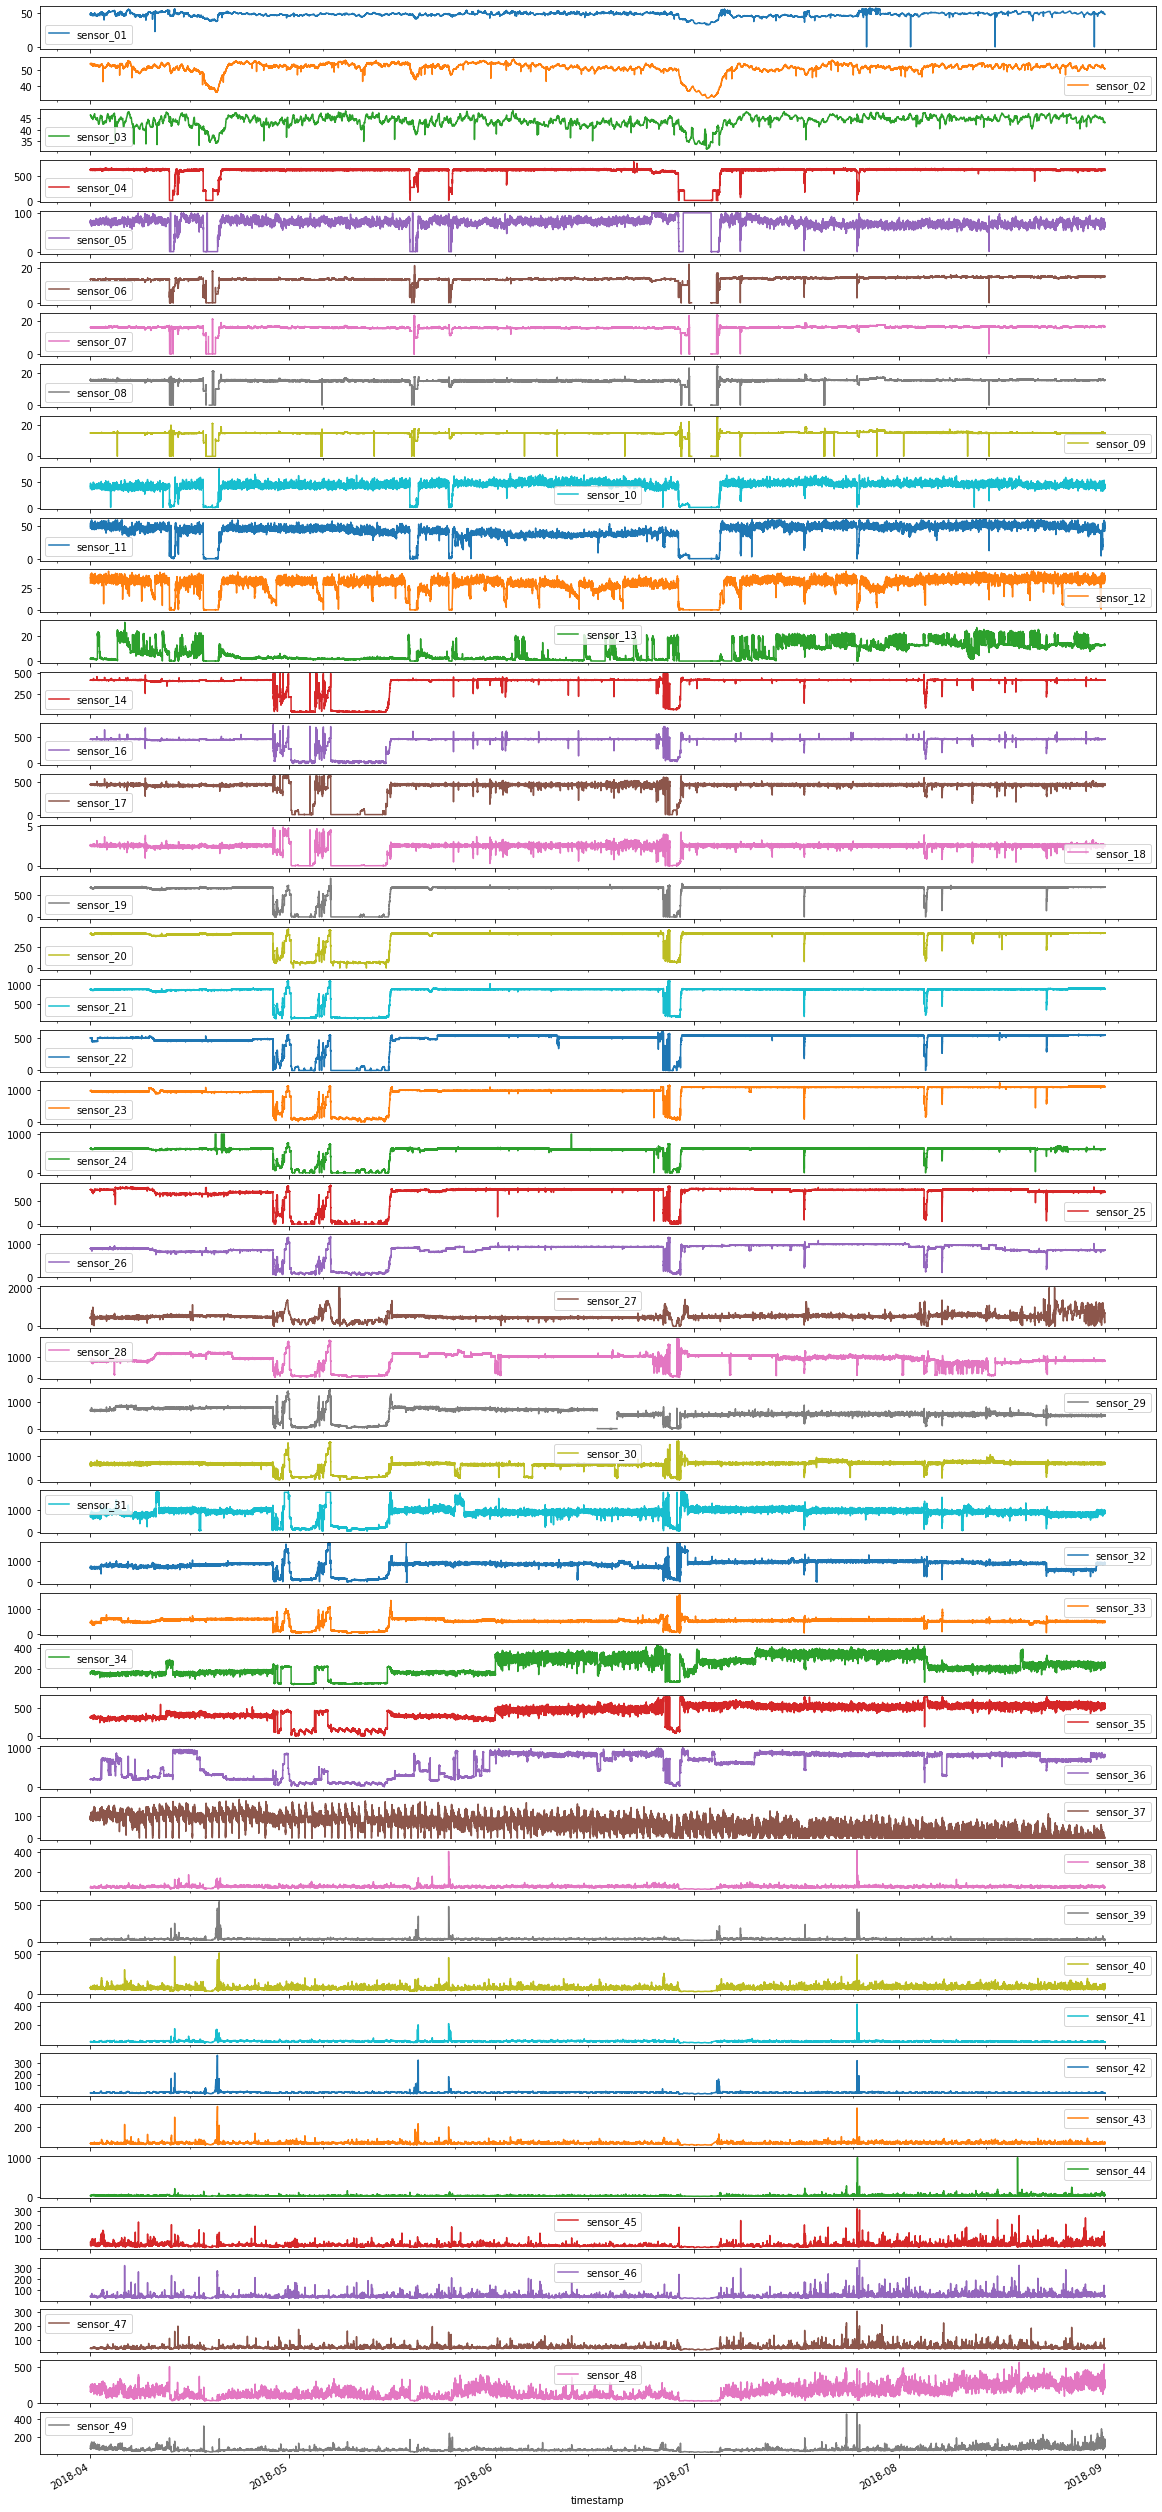

In [13]:
print(sensor_1.plot(subplots =True, sharex = True, figsize = (20,50)))

In [14]:
sensor_1["machine_status"].value_counts()

NORMAL        203169
RECOVERING     14268
BROKEN             7
Name: machine_status, dtype: int64

In [15]:
df1= sensor_1[sensor_1["machine_status"] =="BROKEN"]

In [16]:
df1.isna().sum()

sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0
machine_status    0
dtype: int64

In [17]:
sensor_1=sensor_1.dropna()

In [18]:
sensor_1.shape

(210710, 49)

In [19]:
(220320-210710)/220320

0.04361837327523602

In [20]:
df2 = sensor_1.drop(["machine_status"], axis =1)

In [21]:
list = df2.columns.tolist()

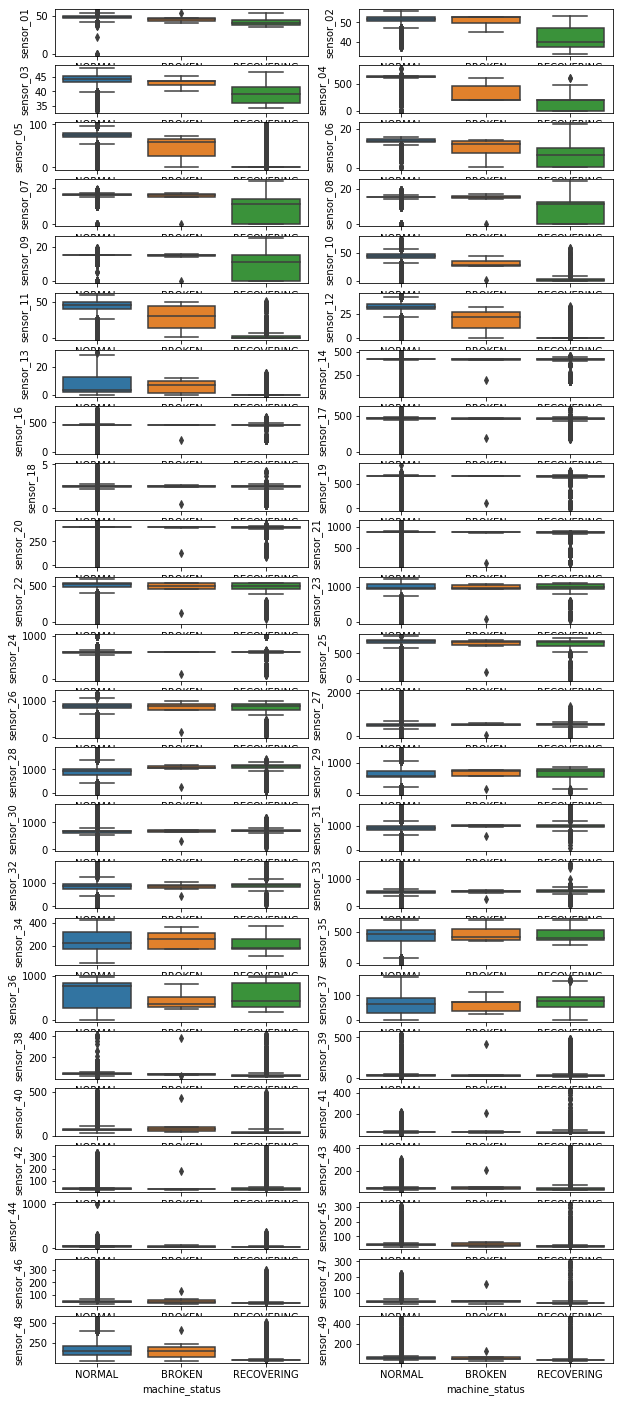

In [22]:
count=1
plt.subplots(figsize=(10, 50))
for i in list:
    plt.subplot(len(list),2,count)
    sns.boxplot(x="machine_status", y= i, data=sensor_1)
    count+=1

plt.show()
    #sns.boxplot(x="machine_status", y= l, data=sensor_1)(x="machine_status", y= l, data=sensor_1)

In [23]:
sensor_1["machine_status"].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

In [24]:
sensor_1['machine_status'].replace({'NORMAL' : 0,'BROKEN' : 1,'RECOVERING' : 2},inplace = True)

In [25]:
sensor_1

,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,0
2018-04-01 00:02:00,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,...,30.468750,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,0
2018-04-01 00:03:00,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,...,30.468750,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,0
2018-04-01 00:04:00,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,...,30.989580,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,0
2018-04-01 00:05:00,47.09201,53.168400,46.397568,637.615700,78.18568,13.41146,16.16753,15.89265,15.16204,39.29406,...,30.989580,31.250000,42.70833,38.773150,63.65741,51.79398,38.773150,164.6412,66.55093,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 23:55:00,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,43.17085,...,30.468750,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,0
2018-08-31 23:56:00,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,43.21038,...,30.208332,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,0
2018-08-31 23:57:00,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,43.12836,...,29.947920,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,0


In [26]:
data = sensor_1.drop(["machine_status"],axis=1)

In [27]:
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(data)

In [28]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents  = pca.fit(data)
#principalDf = pd.DataFrame(data = principalComponents
             #, columns = ['principal component 1', 'principal component 2'])

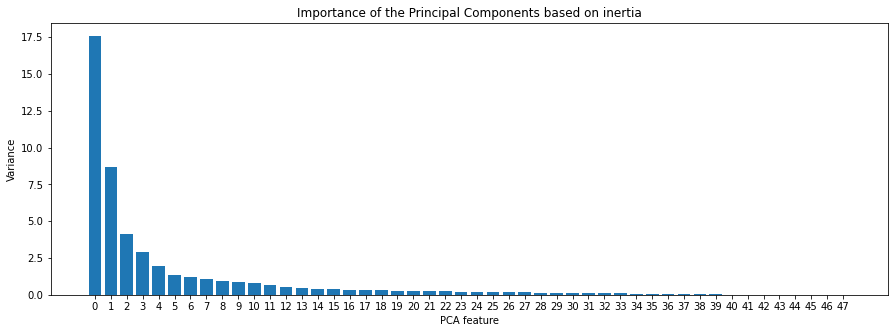

In [29]:
features = range(pca.n_components_)
_ = plt.figure(figsize=(15, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [30]:
pca = PCA(n_components=4)
principalComponents  = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pC1', 'pC2','pC3','pC4'], index= sensor_1.index)

In [31]:
principalDf

,pC1,pC2,pC3,pC4
timestamp,,,,
2018-04-01 00:00:00,-0.080327,-0.396689,-0.691305,-0.351737
2018-04-01 00:02:00,-0.224075,-0.407282,-0.713273,-0.410248
2018-04-01 00:03:00,-0.226050,-0.456674,-0.723891,-0.545724
2018-04-01 00:04:00,-0.182664,-0.564040,-0.586213,-0.605818
2018-04-01 00:05:00,-0.127953,-0.693117,-0.550941,-0.500868
...,...,...,...,...
2018-08-31 23:55:00,-2.172037,-2.251349,-0.673545,3.621452
2018-08-31 23:56:00,-2.173004,-2.279933,-0.739720,3.537275
2018-08-31 23:57:00,-2.186642,-2.279263,-0.741726,3.496240


In [32]:
principalDf['machine_status'] = sensor_1['machine_status']

In [33]:
principalDf

,pC1,pC2,pC3,pC4,machine_status
timestamp,,,,,
2018-04-01 00:00:00,-0.080327,-0.396689,-0.691305,-0.351737,0
2018-04-01 00:02:00,-0.224075,-0.407282,-0.713273,-0.410248,0
2018-04-01 00:03:00,-0.226050,-0.456674,-0.723891,-0.545724,0
2018-04-01 00:04:00,-0.182664,-0.564040,-0.586213,-0.605818,0
2018-04-01 00:05:00,-0.127953,-0.693117,-0.550941,-0.500868,0
...,...,...,...,...,...
2018-08-31 23:55:00,-2.172037,-2.251349,-0.673545,3.621452,0
2018-08-31 23:56:00,-2.173004,-2.279933,-0.739720,3.537275,0
2018-08-31 23:57:00,-2.186642,-2.279263,-0.741726,3.496240,0


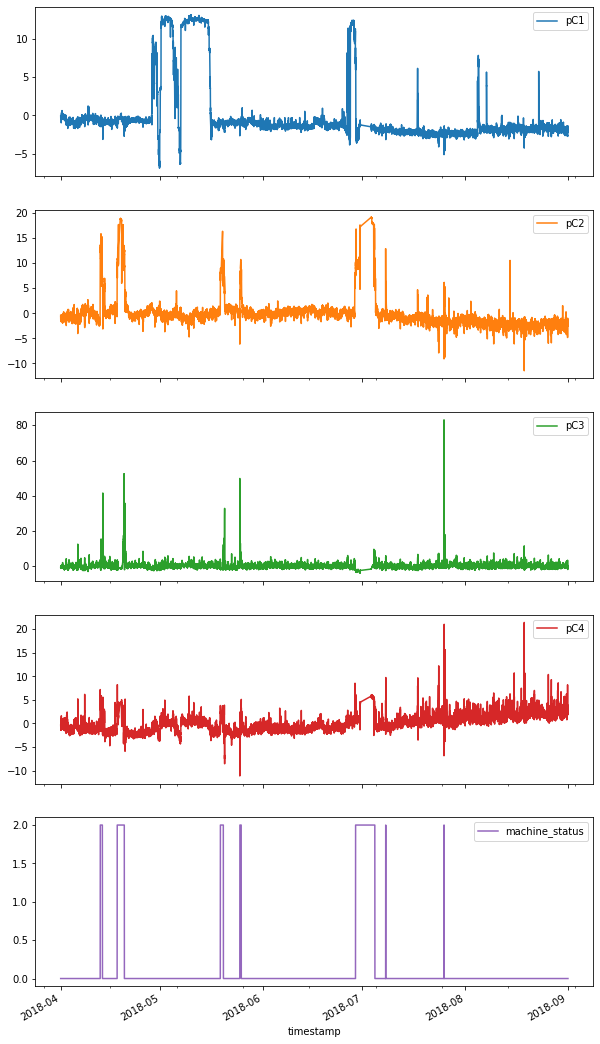

In [34]:
print(principalDf.plot(subplots =True, sharex = True, figsize = (10,20)))

In [35]:
from sklearn.neighbors import NearestNeighbors


In [36]:
X= principalDf.values
nbrs = NearestNeighbors(n_neighbors = 5, algorithm = 'ball_tree').fit(X)

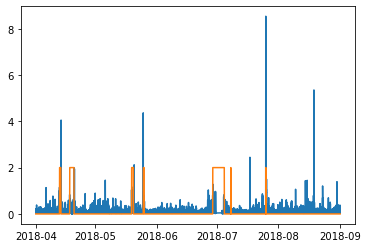

In [37]:
distances, indices = nbrs.kneighbors(X)
principalDf['KNN_Health']= distances.mean(axis=1)
plt.plot(principalDf['KNN_Health'])
plt.plot(principalDf["machine_status"])

In [38]:
from sklearn.ensemble import IsolationForest

In [39]:
X= principalDf.drop(["machine_status"],axis=1).values

In [40]:
clf= IsolationForest(contamination = 0.15)
clf.fit(X)
prediction = clf.predict(X)

In [41]:
abnormal_indx = np.where(prediction<0)
abnormal_indx

(array([   517,    575,    822, ..., 210558, 210559, 210560], dtype=int64),)

In [42]:
clf.decision_function(X)
principalDf["health"] = clf.decision_function(X)

In [43]:
principalDf.head()

,pC1,pC2,pC3,pC4,machine_status,KNN_Health,health
timestamp,,,,,,,
2018-04-01 00:00:00,-0.080327,-0.396689,-0.691305,-0.351737,0,0.101633,0.112637
2018-04-01 00:02:00,-0.224075,-0.407282,-0.713273,-0.410248,0,0.076598,0.120415
2018-04-01 00:03:00,-0.226050,-0.456674,-0.723891,-0.545724,0,0.058696,0.108986
2018-04-01 00:04:00,-0.182664,-0.564040,-0.586213,-0.605818,0,0.084576,0.118981
2018-04-01 00:05:00,-0.127953,-0.693117,-0.550941,-0.500868,0,0.114160,0.105015


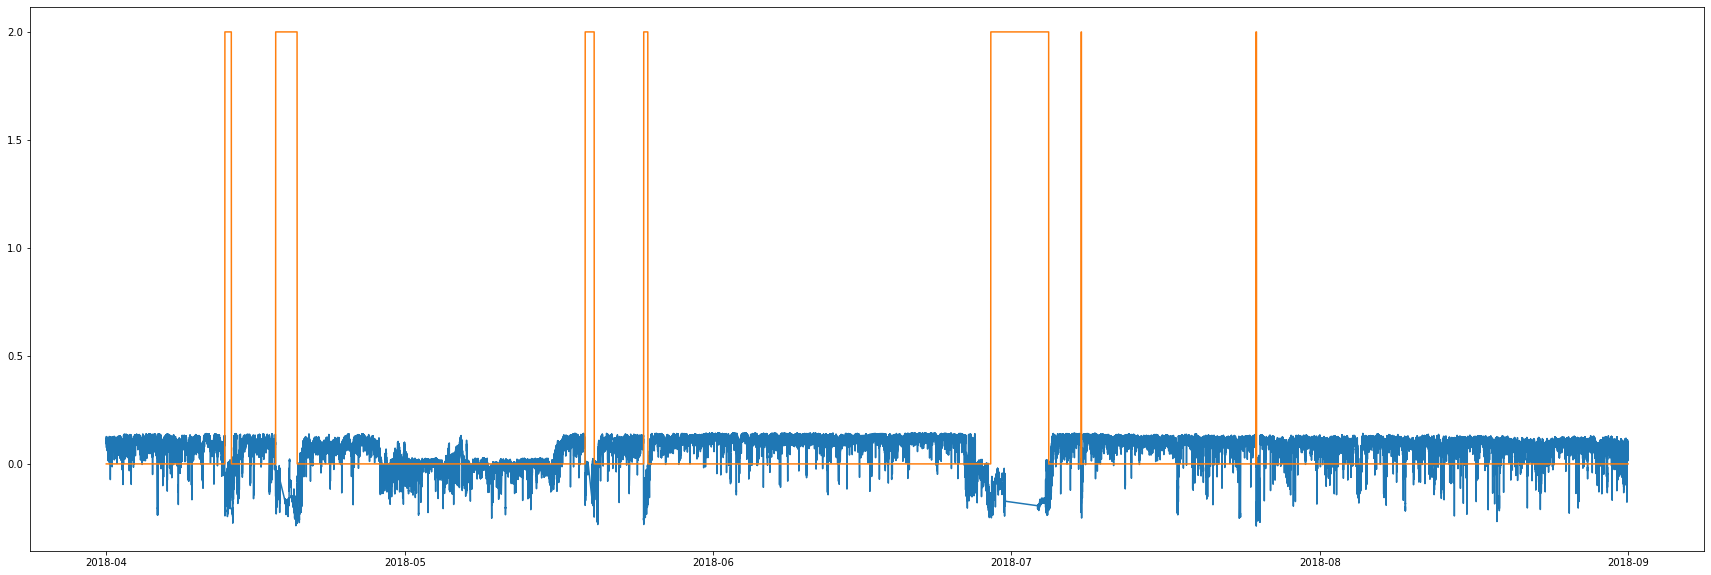

In [44]:
plt.figure(figsize=(30,10))
plt.plot(principalDf["health"])
plt.plot(principalDf["machine_status"])

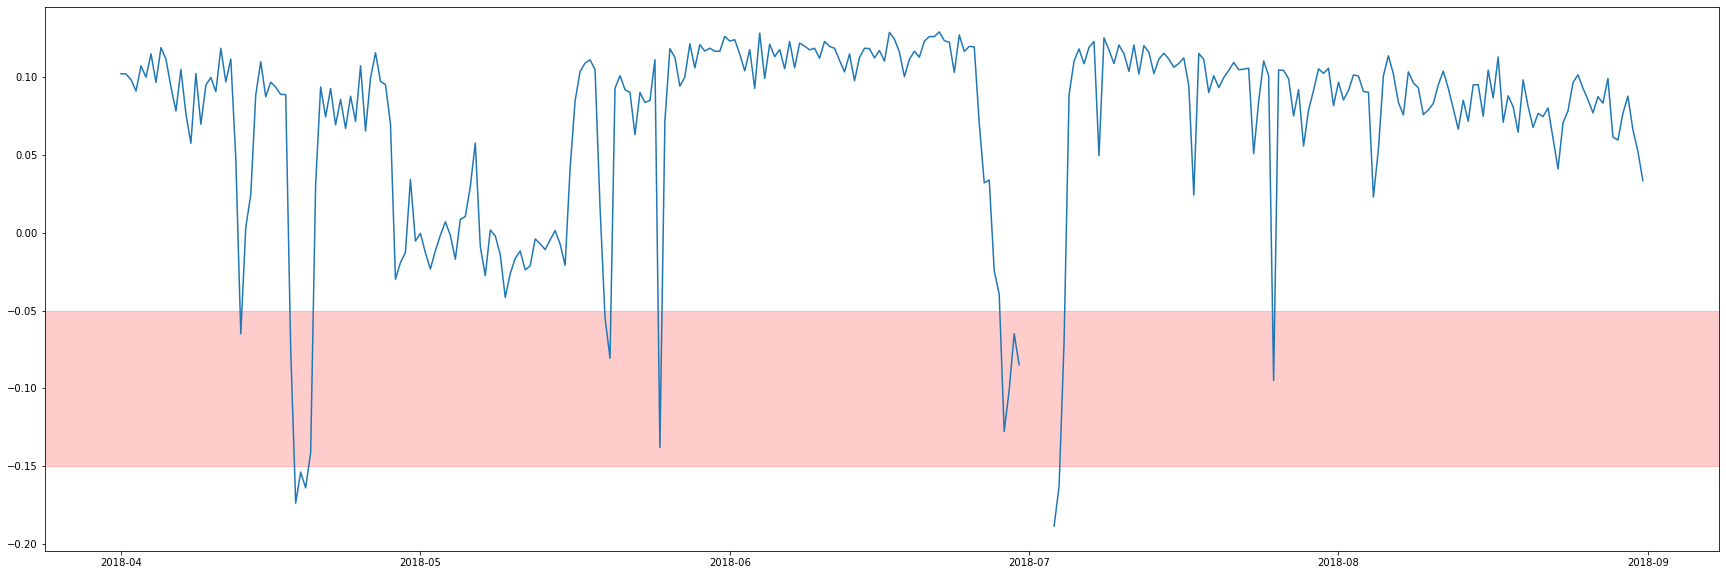

In [45]:
plt.figure(figsize=(30,10))
plt.plot(principalDf["health"].resample('0.5D').mean())
plt.axhspan(-0.15, -0.05, alpha= 0.2, color = "r")

In [46]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result1 = adfuller(principalDf['pC2'])
# Print p-value
print(result1[1])

2.7507825869062465e-09


## Isolation forest

In [47]:
X= sensor_1.drop(["machine_status"],axis=1).values

In [48]:
X.shape

(210710, 48)

In [49]:
from sklearn.ensemble import IsolationForest

In [50]:
clf= IsolationForest(contamination = 0.15)
clf.fit(X)
prediction = clf.predict(X)

In [51]:
(prediction>0).mean()

0.8499976270703811

In [52]:
(prediction<0).mean()

0.1500023729296189

In [53]:
abnormal_indx = np.where(prediction<0)
abnormal_indx

(array([ 16837,  16838,  16839, ..., 202334, 202335, 202336], dtype=int64),)

In [54]:
clf.decision_function(X)

array([0.12441133, 0.12207244, 0.1279335 , ..., 0.09406945, 0.09429487,
       0.09475432])

In [55]:
sensor_1["health"] = clf.decision_function(X)

In [56]:
sensor_1.head()

,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,machine_status,health
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,0,0.124411
2018-04-01 00:02:00,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,0,0.122072
2018-04-01 00:03:00,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,0,0.127934
2018-04-01 00:04:00,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,0,0.124610
2018-04-01 00:05:00,47.09201,53.1684,46.397568,637.6157,78.18568,13.41146,16.16753,15.89265,15.16204,39.29406,...,31.250000,42.70833,38.773150,63.65741,51.79398,38.773150,164.6412,66.55093,0,0.121665


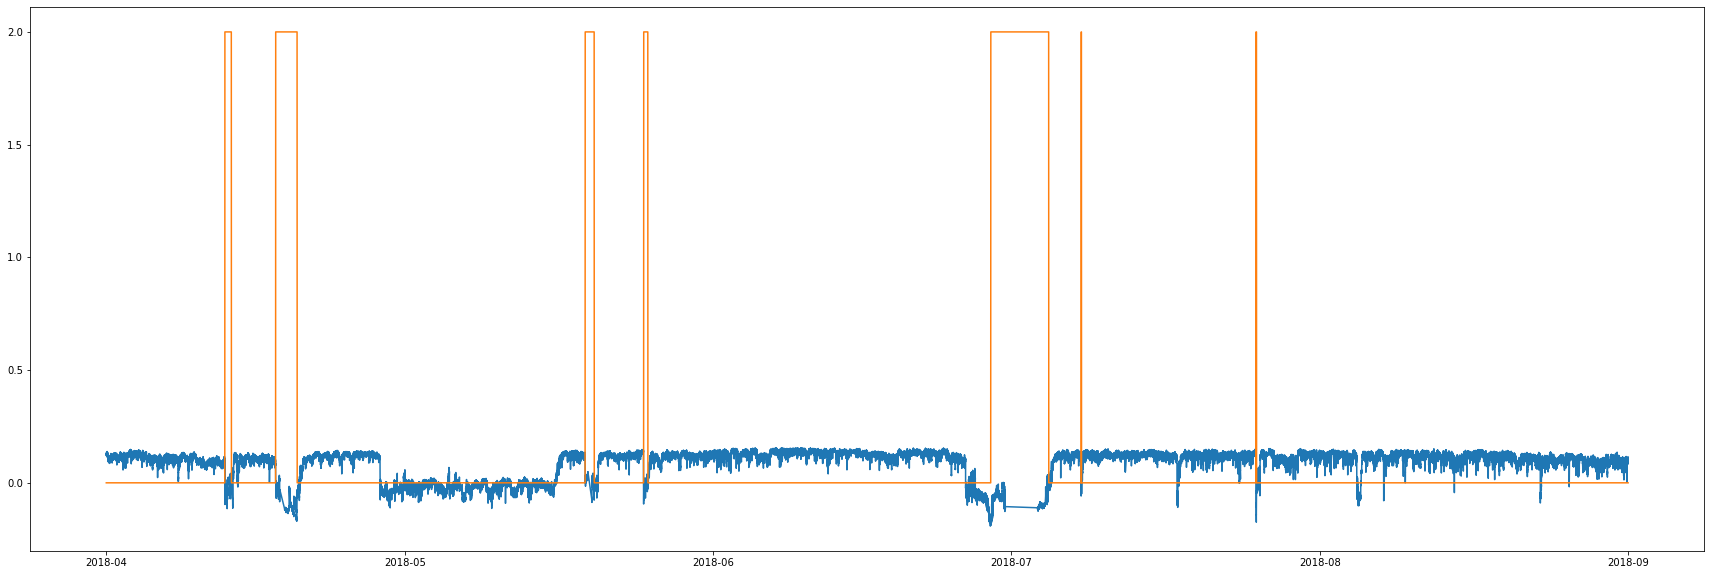

In [57]:
plt.figure(figsize=(30,10))
plt.plot(sensor_1["health"])
plt.plot(sensor_1["machine_status"])

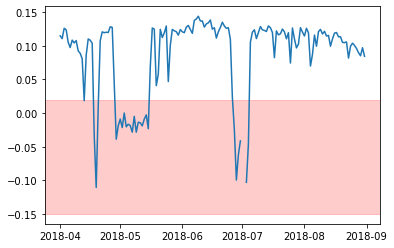

In [58]:
plt.plot(sensor_1["health"].resample('1D').mean())
plt.axhspan(-0.15, 0.02, alpha= 0.2, color = "r")

## KNN 

In [59]:
from sklearn.neighbors import NearestNeighbors


In [60]:
X= sensor_1.values
nbrs = NearestNeighbors(n_neighbors = 5, algorithm = 'ball_tree').fit(X)

In [ ]:
distances, indices = nbrs.kneighbors(X)
sensor_1['KNN_Health']= distances.mean(axis=1)
plt.plot(sensor_1['KNN_Health'])

In [ ]:
plt.plot(sensor_1['KNN_Health'])
plt.plot(sensor_1["machine_status"]*100)